## Loading the dataset from kaggle




In [ ]:
import kagglehub

path = kagglehub.dataset_download("jahnavipaliwal/mountains-vs-beaches-preference")

In [ ]:
import os
print(os.listdir(path)) #to check contents of the directory

['mountains_vs_beaches_preferences.csv']


In [ ]:
file_path = os.path.join(path, "mountains_vs_beaches_preferences.csv")

import pandas as pd
df = pd.read_csv(file_path)

print(df.head())

   Age      Gender  Income Education_Level  Travel_Frequency  \
0   56        male   71477        bachelor                 9   
1   69        male   88740          master                 1   
2   46      female   46562          master                 0   
3   32  non-binary   99044     high school                 6   
4   60      female  106583     high school                 5   

  Preferred_Activities  Vacation_Budget  Location  Proximity_to_Mountains  \
0               skiing             2477     urban                     175   
1             swimming             4777  suburban                     228   
2               skiing             1469     urban                      71   
3               hiking             1482     rural                      31   
4           sunbathing              516  suburban                      23   

   Proximity_to_Beaches Favorite_Season  Pets  Environmental_Concerns  \
0                   267          summer     0                       1   
1     

## Checking for null values

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Income,0
Education_Level,0
Travel_Frequency,0
Preferred_Activities,0
Vacation_Budget,0
Location,0
Proximity_to_Mountains,0
Proximity_to_Beaches,0


In [ ]:
df.dtypes

,0
Age,int64
Gender,object
Income,int64
Education_Level,object
Travel_Frequency,int64
Preferred_Activities,object
Vacation_Budget,int64
Location,object
Proximity_to_Mountains,int64
Proximity_to_Beaches,int64


# Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder

for i in df.columns:
  if df[i].dtype == 'object':
    #df[i] = df[i].astype('category').cat.codes
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

## Finding feature importance using Random Forest

In [ ]:
X=df.drop('Preference',axis=1)
y=df['Preference']
feature_names=X.columns

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=df['Preference'])

model=RandomForestClassifier()
model.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
# Built-in feature importance (Gini Importance)
importances = model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
print(feature_imp_df)

                   Feature  Gini Importance
5     Preferred_Activities         0.424918
9     Proximity_to_Beaches         0.250657
8   Proximity_to_Mountains         0.244933
2                   Income         0.017892
6          Vacation_Budget         0.017723
0                      Age         0.013407
4         Travel_Frequency         0.008482
10         Favorite_Season         0.005059
3          Education_Level         0.004907
1                   Gender         0.003831
7                 Location         0.003820
12  Environmental_Concerns         0.002323
11                    Pets         0.002048


In [ ]:
#dropping columns with low feature importance

df.drop(columns=['Environmental_Concerns','Pets','Location','Gender','Education_Level'],inplace=True)

# Dimensionality reduction
## Step 1: Splitting data into test and train

In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('Preference',axis=1)
y=df['Preference']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=df['Preference'])

## Step 2: Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Step 3: Finding optimal component Applying *PCA*

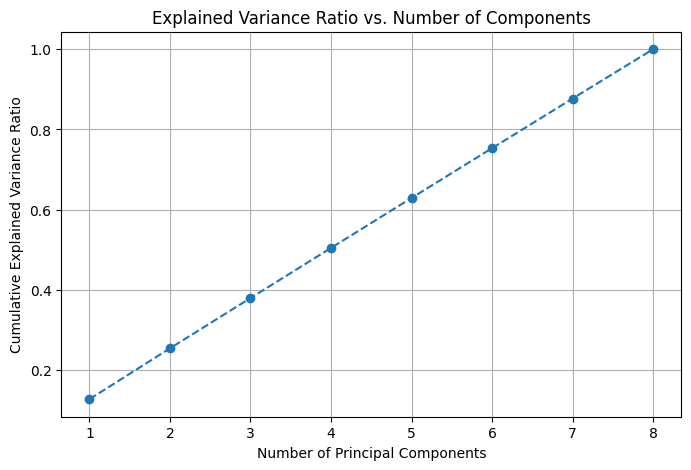

Optimal number of components: 8
Reduced X_train shape: (41955, 8)
Reduced X_test shape: (10489, 8)


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA on the scaled training data
pca = PCA()
pca.fit(X_train)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid()
plt.show()

# Find the optimal number of components for 95% variance explained
optimal_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

# Apply PCA with optimal components
pca_optimal = PCA(n_components=optimal_components)
X_train_reduced = pca_optimal.fit_transform(X_train)
X_test_reduced = pca_optimal.transform(X_test)

# Display the shapes of the reduced datasets
print(f"Reduced X_train shape: {X_train_reduced.shape}")
print(f"Reduced X_test shape: {X_test_reduced.shape}")

# Creating pipelines to for classification prediction


In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

pipe1 = Pipeline([('logistic_regression', LogisticRegression())])
pipe2 = Pipeline([('SVC', SVC(C=0.1))])
pipe3 = Pipeline([('RandomForestClassifier', RandomForestClassifier())])
pipe4 = Pipeline([('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=20))])
pipe5 = Pipeline([('DecisionTreeClassifier', DecisionTreeClassifier())])
pipe6 = Pipeline([('GradientBoostingClassifier', GradientBoostingClassifier())])
pipe7 = Pipeline([('AdaBoostClassifier', AdaBoostClassifier())])

## Fitting different classification models to our pre-processed data and calculating different metrics to evaluate performance of each model


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, auc, roc_curve

pipelines=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7]

for pipe in pipelines:
  print('\n',pipe[0]," : ")
  pipe.fit(X_train_reduced,y_train)
  y_pred=pipe.predict(X_test_reduced)
  print("Accuracy Score",accuracy_score(y_test,y_pred))
  print("Precision Score",precision_score(y_test,y_pred))
  print("Recall Score",recall_score(y_test,y_pred))
  print("F1 Score",f1_score(y_test,y_pred))
  print("Confusion Matrix",confusion_matrix(y_test,y_pred))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  print("AUC Score",auc(fpr, tpr))



 LogisticRegression()  : 
Accuracy Score 0.8946515397082658
Precision Score 0.8061019670814934
Recall Score 0.7634980988593156
F1 Score 0.7842218316735012
Confusion Matrix [[7376  483]
 [ 622 2008]]
AUC Score 0.8510199490352056

 SVC(C=0.1)  : 
Accuracy Score 0.9827438268662408
Precision Score 0.9777604369879048
Recall Score 0.9528517110266159
F1 Score 0.9651453880223377
Confusion Matrix [[7802   57]
 [ 124 2506]]
AUC Score 0.9727994399388074

 RandomForestClassifier()  : 
Accuracy Score 0.9617694727810087
Precision Score 0.9649561952440551
Recall Score 0.879467680608365
F1 Score 0.9202307539287846
Confusion Matrix [[7775   84]
 [ 317 2313]]
AUC Score 0.9343896489312342

 KNeighborsClassifier(n_neighbors=20)  : 
Accuracy Score 0.971875297931166
Precision Score 0.9698189134808853
Recall Score 0.9163498098859315
F1 Score 0.9423264907135875
Confusion Matrix [[7784   75]
 [ 220 2410]]
AUC Score 0.9534033055028334

 DecisionTreeClassifier()  : 
Accuracy Score 0.9222995519115263
Precision S


 LogisticRegression()  : 
Accuracy Score 0.8946515397082658
Precision Score 0.8061019670814934
Recall Score 0.7634980988593156
F1 Score 0.7842218316735012
AUC Score 0.8510199490352056
Confusion Matrix [[7376  483]
 [ 622 2008]]


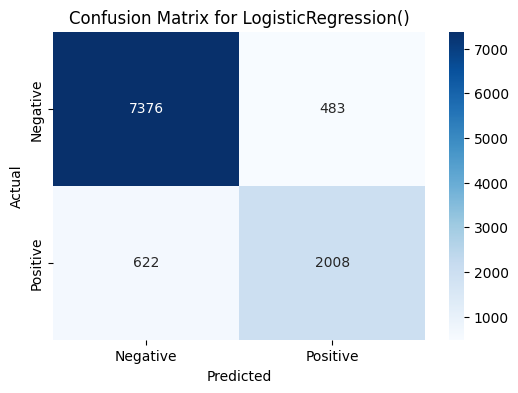


 SVC(C=0.1)  : 
Accuracy Score 0.9827438268662408
Precision Score 0.9777604369879048
Recall Score 0.9528517110266159
F1 Score 0.9651453880223377
AUC Score 0.9727994399388074
Confusion Matrix [[7802   57]
 [ 124 2506]]


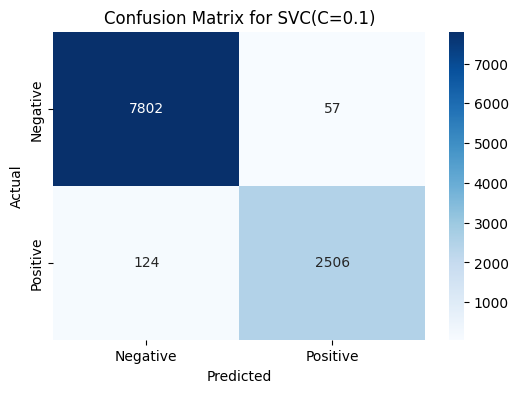


 RandomForestClassifier()  : 
Accuracy Score 0.9602440652111736
Precision Score 0.9593192195931922
Recall Score 0.8787072243346008
F1 Score 0.9172454852153205
AUC Score 0.9331187222321942
Confusion Matrix [[7761   98]
 [ 319 2311]]


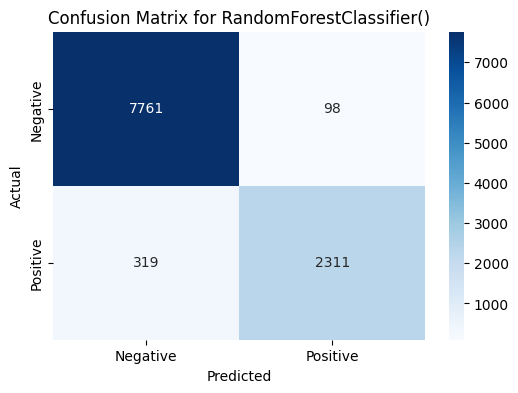


 KNeighborsClassifier(n_neighbors=20)  : 
Accuracy Score 0.971875297931166
Precision Score 0.9698189134808853
Recall Score 0.9163498098859315
F1 Score 0.9423264907135875
AUC Score 0.9534033055028334
Confusion Matrix [[7784   75]
 [ 220 2410]]


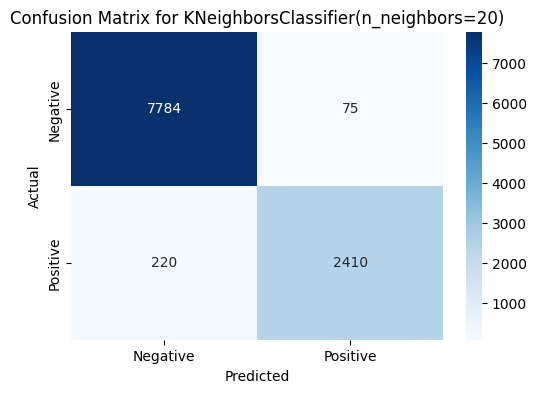


 DecisionTreeClassifier()  : 
Accuracy Score 0.9220135379921823
Precision Score 0.8522550544323484
Recall Score 0.8334600760456273
F1 Score 0.8427527873894656
AUC Score 0.8925539341928099
Confusion Matrix [[7479  380]
 [ 438 2192]]


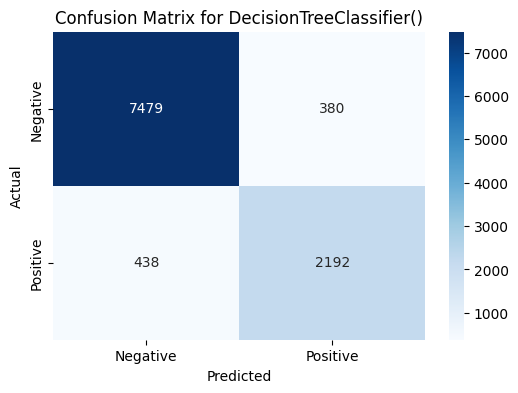


 GradientBoostingClassifier()  : 
Accuracy Score 0.9300219277338164
Precision Score 0.9086206896551724
Recall Score 0.8015209125475286
F1 Score 0.8517171717171718
AUC Score 0.8872727351896569
Confusion Matrix [[7647  212]
 [ 522 2108]]


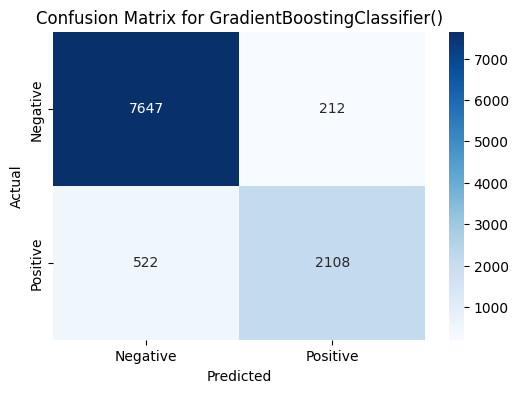


 AdaBoostClassifier()  : 
Accuracy Score 0.8959862713318715
Precision Score 0.8152396558787383
Recall Score 0.7566539923954373
F1 Score 0.7848550581739302
AUC Score 0.8496337782310563
Confusion Matrix [[7408  451]
 [ 640 1990]]


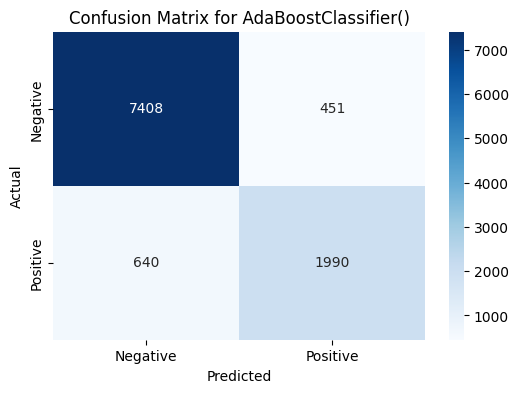

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for pipe in pipelines:
    print()
    print(pipe[0], " : ")
    pipe.fit(X_train_reduced, y_train)
    y_pred = pipe.predict(X_test_reduced)

    # Metrics
    print("Accuracy Score :", accuracy_score(y_test, y_pred))
    print("Precision Score :", precision_score(y_test, y_pred))
    print("Recall Score :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))

    # AUC Score
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    print("AUC Score", auc(fpr, tpr))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {pipe[0]}')
    plt.show()
